In [2]:
import pandas as pd
import datetime

""" This script computes the plots for Section 3 on governmental organizations and their involvement in innovation networks"""
# import partnership data
long_df = pd.read_csv("../Data/innovation_network_prepost_2020-01-01.csv")

In [3]:
# Filter Post IRA Period
long_df['post_date'] = pd.to_datetime(long_df['post_date'])
long_df = long_df[long_df['post_date'] >= datetime.datetime(2022, 7, 1)]

# Drop unnecessary columns
columns = long_df.columns[6:]

# add a "partners" column where partners are alphabetically ordered, in order to be able to drop duplicate partnerships more efficiently
columns_= list(columns)
columns_.append('partners')
long_df["partners"] = long_df.apply(lambda x: '-'.join(sorted([x['source'], x['target']])), axis=1)


In [4]:
# import organization data
df2 = pd.read_csv("../Data/organizations_prepost_2020-01-01.csv")

# get a list with the Linkedin key of all Governmental organizations, including International organizations (e.g., European Commission)
list_govermentals = list(df2["Linkedin_name"][df2.firm_type.str.contains("Govern|Internation", case=False, na=False)].drop_duplicates())
print(list_govermentals)

['acc-new-zealand', 'act-government', 'advanced-research-projects-agency-energy-arpa-e-', 'agglolenslievin', 'alvayhtiot', 'autoridad-portuaria-de-valencia', 'acm---autoriteit-consument-&amp;-markt', 'becsocial', 'bird-foundation', 'bmwk', 'bmz-bund', 'bureau-of-ocean-energy-management', 'bureau-of-safety-and-environmental-enforcement', 'banconacion', 'big-society-capital', 'city-of-boulder-city', 'rand-corporation', 'brookhavenlab', 'iowa-economic-development-authority-ieda-', 'cea', 'clean-energy-regulator', 'checgrupoepm', '283032', '33214', 'cofides', 'csir', 'connecticut-department-of-transportation', 'ctgreenbank', 'connecticut-public-utilities-regulatory-authority-pura', 'catholic-charities-brooklyn-and-queens', 'city-of-minneapolis', 'city-of-mankato', 'city-of-abbotsford', 'city-of-brantford', 'city-of-edmonton', 'city-of-livermore', 'city-of-loveland', 'city-of-redlands', 'cofide', 'comune-di-milano', 'sunshine-coast-regional-council', 'dfcgov', '12908319', 'emasamalaga', 'en

In [5]:
# get a list of the post ids of all partnerships involving governmental organizations
list_post_ids = list(long_df["collaboration_id"][long_df["source"].isin(list_govermentals) | long_df["target"].isin(list_govermentals)].drop_duplicates())


In [6]:
# Check how many partnerships are directly involving governmental organizations or indirectly involving governmental organizations (i.e., by stemming from multi-acto collaborations that involve governments)

# direct involvement: partnerships that include at least one organization that is part of the list of governmental organizations
number_of_direct_gov_partnerships = long_df[long_df["source"].isin(list_govermentals) | long_df["target"].isin(list_govermentals)].drop_duplicates(subset=columns_[28:]).shape[0]

print("number of direct partnerships",number_of_direct_gov_partnerships)

number_of_gov_partnerships = long_df[long_df["collaboration_id"].isin(list_post_ids)].drop_duplicates(subset=columns_).shape[0]
partners_in_gov_partnerships = long_df[long_df["collaboration_id"].isin(list_post_ids)]["partners"].drop_duplicates()
print("number of partnerships indirectly depending on governmental organizations: ", number_of_gov_partnerships)

long_df_unique = long_df.drop_duplicates(subset=columns_)
print("number of total partnerships: ", long_df_unique.shape[0])

number of direct partnerships 252519
number of partnerships indirectly depending on governmental organizations:  559264
number of total partnerships:  898946


In [8]:
### By technology
# technologies to analyze:
list_techs= [ "Biomass", "Biofuels", "Biogas", "Wind", "Offshore_Wind",
                   "Solar", "Concentrated_Solar", "Waste_to_Heat", "Direct_Air_Capture", "Carbon_Capture_And_Storage", "Biochar", "BECCS",
                   "Carbon_Direct_Removal", "Hydrogen", "Nuclear_Energy", "Nuclear_Fusion", "Hydro_Energy",
                   "Geothermal", "Battery", "Electric_Vehicles", "Sustainable_Aviation_Fuels", "E_Fuels",
                   "Marine_Energy", "Heat_Pumps", "Railway", "Electric_Shipping", "Electric_Aviation","Fuel_Cell_Aviation"]

total_partnerships = []
gov_partnerships_direct = []
gov_partnerships_indirect = []
relation_gov_partnerships = []
for technology in list_techs:
    print(technology)
    df_tech = long_df[long_df[technology]==1]

    list_post_ids = list(df_tech["collaboration_id"][df_tech["source"].isin(list_govermentals) | df_tech["target"].isin(list_govermentals)].drop_duplicates())
    
    # compute direct involvement (governmental organizations are either source or target in a partnership)
    number_of_direct_gov_partnerships = df_tech[df_tech["source"].isin(list_govermentals) | df_tech["target"].isin(list_govermentals)].drop_duplicates(subset=columns_[28:]).shape[0]
    gov_partnerships_direct.append(number_of_direct_gov_partnerships)
    
    # indirect involvement: governmental organizations are part of a multi-actor collaboration from which this partnership is derived
    number_of_gov_partnerships = df_tech[df_tech["collaboration_id"].isin(list_post_ids)].drop_duplicates(subset=columns_[28:]).shape[0]
    print("number of partnerships with governmentals for technology ", technology, ": ", number_of_gov_partnerships)
    gov_partnerships_indirect.append(number_of_gov_partnerships)
    
    # overall number of partnerships for technology
    long_df_unique = df_tech.drop_duplicates(subset=columns_[28:])
    print("number of total partnerships for technology ", technology, ": ", long_df_unique.shape[0])
    total_partnerships.append(long_df_unique.shape[0])
    print("percentage of partnerships with governmentals for technology ", technology, ": ", number_of_gov_partnerships/long_df_unique.shape[0])
    relation_gov_partnerships.append(number_of_gov_partnerships/long_df_unique.shape[0])

# Create a dataframe
df_governmental_involvement_by_tech = pd.DataFrame({"technology": list_techs, "total_partnerships": total_partnerships, "gov_partnerships_indirect": gov_partnerships_indirect, "relation_gov_partnerships": relation_gov_partnerships, "gov_partnerships_direct": gov_partnerships_direct})
df_governmental_involvement_by_tech.to_csv("governmental_involvement_by_tech.csv", index=False)


Biomass
number of partnerships with governmentals for technology  Biomass :  9258
number of total partnerships for technology  Biomass :  12205
percentage of partnerships with governmentals for technology  Biomass :  0.7585415813191315
Biofuels
number of partnerships with governmentals for technology  Biofuels :  8077
number of total partnerships for technology  Biofuels :  13197
percentage of partnerships with governmentals for technology  Biofuels :  0.6120330378116239
Biogas
number of partnerships with governmentals for technology  Biogas :  16399
number of total partnerships for technology  Biogas :  23926
percentage of partnerships with governmentals for technology  Biogas :  0.6854049987461339
Wind
number of partnerships with governmentals for technology  Wind :  81084
number of total partnerships for technology  Wind :  135964
percentage of partnerships with governmentals for technology  Wind :  0.5963637433438264
Offshore_Wind
number of partnerships with governmentals for techn

In [9]:
import numpy as np

# Create a dataframe to analyze governmental involvement by  BOTH technology AND type of collaboration
type_of_collab= columns[28:-6]
print(type_of_collab)
list_techs= [ "All","Biomass", "Biofuels", "Biogas", "Wind", "Offshore_Wind",
                   "Solar", "Concentrated_Solar", "Waste_to_Heat", "Direct_Air_Capture", "Carbon_Capture_And_Storage", "Biochar", "BECCS",
                   "Carbon_Direct_Removal", "Hydrogen", "Nuclear_Energy", "Nuclear_Fusion", "Hydro_Energy",
                   "Geothermal", "Battery", "Electric_Vehicles", "Sustainable_Aviation_Fuels", "E_Fuels",
                   "Marine_Energy", "Heat_Pumps", "Railway", "Electric_Shipping", "Electric_Aviation","Fuel_Cell_Aviation"]
type_of_collab = ['All','r_and_d_collaborations', 'demonstrations_and_pilots',
       'commercialisation_and_product_launches',
       'production_and_manufacturing', 'offtake_agreements_and_futures',
       'adoption_and_deployments', 'operations_and_maintenance', 'grants',
       'equity_investments', 'loans', 'other_unspecified_finance', 'spin_offs',
       'mergers_and_acquisitions', 'joint_ventures',
       'incubators_and_accelerator_programs', 'certification_and_approvals',
       'training']

technologies = []
total_partnerships = []
gov_partnerships_direct = []
gov_partnerships_indirect = []
relation_gov_partnerships = []
collabs = []
for technology in list_techs:
    print(technology)
    if technology == "All":
        df_tech = long_df
    else:
        df_tech = long_df[long_df[technology]==1]
    for collab in type_of_collab:
        print(collab)
        if collab == "All":
            df_collab = df_tech
        else:
            df_collab = df_tech[df_tech[collab]==1]
        technologies.append(technology)
        collabs.append(collab)


        list_post_ids = list(df_collab["collaboration_id"][df_collab["source"].isin(list_govermentals) | df_collab["target"].isin(list_govermentals)].drop_duplicates())
        number_of_direct_gov_partnerships = df_collab[df_collab["source"].isin(list_govermentals) | df_collab["target"].isin(list_govermentals)].drop_duplicates(subset=columns_[28:]).shape[0]
        gov_partnerships_direct.append(number_of_direct_gov_partnerships)

        number_of_gov_partnerships = df_collab[df_collab["collaboration_id"].isin(list_post_ids)].drop_duplicates(subset=columns_[28:]).shape[0]
       # print("number of partnerships with governmentals for technology ", technology, " and collaboration type ", collab, ": ", number_of_gov_partnerships)
        gov_partnerships_indirect.append(number_of_gov_partnerships)
        print(list_post_ids[:10])
        long_df_unique = df_collab.drop_duplicates(subset=columns_[28:])
       # print("number of total partnerships for technology ", technology, " and collaboration type ", collab, ": ", long_df_unique.shape[0])
        total_partnerships.append(long_df_unique.shape[0])
       # print("percentage of partnerships with governmentals for technology ", technology, " and collaboration type ", collab, ": ", number_of_gov_partnerships/long_df_unique.shape[0])
        try:
            relation_gov_partnerships.append(number_of_gov_partnerships/long_df_unique.shape[0])
        except:
            relation_gov_partnerships.append(np.nan)

df_governmental_involvement_by_tech_collab = pd.DataFrame({"technology": technologies, "collab": collabs, "total_partnerships": total_partnerships, "gov_partnerships_indirect": gov_partnerships_indirect, "relation_gov_partnerships": relation_gov_partnerships, "gov_partnerships_direct": gov_partnerships_direct})

df_governmental_involvement_by_tech_collab.to_csv("governmental_involvement_by_tech_collab.csv", index=False)

Index(['r_and_d_collaborations', 'demonstrations_and_pilots',
       'commercialisation_and_product_launches',
       'production_and_manufacturing', 'offtake_agreements_and_futures',
       'adoption_and_deployments', 'operations_and_maintenance', 'grants',
       'equity_investments', 'loans', 'other_unspecified_finance', 'spin_offs',
       'mergers_and_acquisitions', 'joint_ventures',
       'incubators_and_accelerator_programs', 'certification_and_approvals',
       'training'],
      dtype='object')
All
All
['7057726396353167360_0', '7249916560746684416_0', '7030874638024888320_0', '7239667820207255553_0', '7041057088386568192_0', '7165351113481781248_0', '7199091652919988227_0', '7036002844818186240_0', '6971321396257804288_0', '7042450346819903489_0']
r_and_d_collaborations
['7030874638024888320_0', '7042450346819903489_0', '7032265032721678337_0', '7138844677624979456_0', '7117056687110242304_0', '7242880245136048128_0', '7089514257926479872_0', '7265626978664267776_0', '71447

In [10]:
### ordered list:
df_ordered_techs = df_governmental_involvement_by_tech_collab[df_governmental_involvement_by_tech_collab.collab=="All"]
df_ordered_techs = df_ordered_techs[["technology","total_partnerships"]].sort_values(by="total_partnerships", ascending=False).reset_index()
list_ordered_techs = list(df_ordered_techs["technology"])
print(list_ordered_techs)

['All', 'Hydrogen', 'Solar', 'Wind', 'Battery', 'Electric_Vehicles', 'Offshore_Wind', 'Marine_Energy', 'Carbon_Capture_And_Storage', 'Electric_Shipping', 'Biogas', 'Heat_Pumps', 'Sustainable_Aviation_Fuels', 'Railway', 'Fuel_Cell_Aviation', 'Biofuels', 'Geothermal', 'Biomass', 'Hydro_Energy', 'E_Fuels', 'Nuclear_Energy', 'Carbon_Direct_Removal', 'Electric_Aviation', 'Waste_to_Heat', 'Biochar', 'Direct_Air_Capture', 'Concentrated_Solar', 'Nuclear_Fusion', 'BECCS']


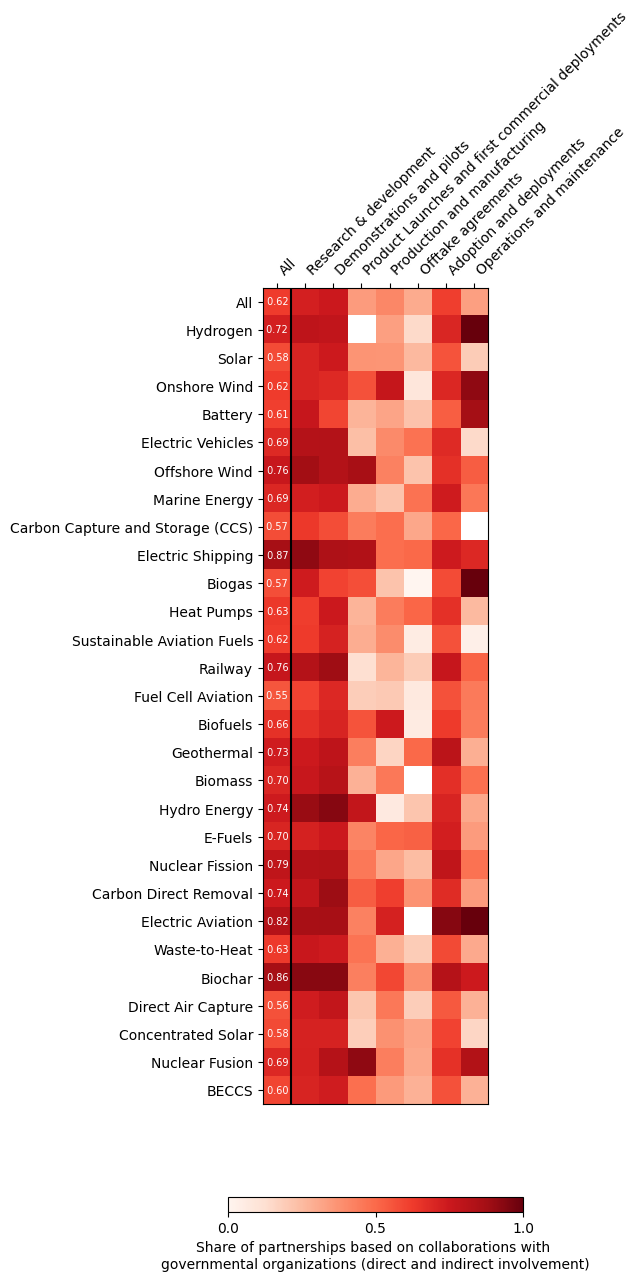

In [16]:
### Create a heatmap with the relation govenmental partnerships
""" WITH MASKED ARRAY"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy.ma as ma

df_shares = df_governmental_involvement_by_tech_collab[['technology', 'collab', 'relation_gov_partnerships']].pivot(index='technology', columns='collab', values='relation_gov_partnerships')

df_shares = df_shares[['All','r_and_d_collaborations', 'demonstrations_and_pilots',
       'commercialisation_and_product_launches',
       'production_and_manufacturing', 'offtake_agreements_and_futures',
       'adoption_and_deployments', 'operations_and_maintenance']]
# Mask the array where values are 0
masked_array = ma.masked_where(df_shares == 0, df_shares)

# Create a colormap with white color for masked elements
cmap = mcolors.ListedColormap(['white'])
cmap.set_bad(color='white')

# Create a custom colormap
base_cmap = plt.cm.Blues

# Stretch the Blues colormap to its darkest color at 0.4
blues_colors = base_cmap(np.linspace(0, 1, int(256 * 0.5)))

# Create a transition from the darkest blue to black from 0.4 to 0.5
transition = np.linspace(blues_colors[-1], [1, 0, 0, 1], int(256 * 0.4))

# Combine the two segments
combined_colors = np.vstack((blues_colors, transition))

# Create the custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_blues_black", combined_colors)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 12))
cax = plt.imshow(masked_array, cmap='Reds', interpolation='nearest', vmin=0, vmax=1)
ax.grid(False)
# Draw the line at the specified index; adjust line properties as needed
ax.axvline(x=0 + 0.5, color='black', linewidth=1.5)

ax.xaxis.tick_top()

# Add colorbar below the figure
cbar = plt.colorbar(cax, orientation='horizontal', fraction=0.016, pad=0.1)
cbar.set_label('Share of partnerships based on collaborations with \ngovernmental organizations (direct and indirect involvement)')
cbar.set_ticks([0, 0.5, 1])


# Label for x and y ticks
labels_tech = ['All', 'Hydrogen', 'Solar', 'Onshore Wind', 'Battery', 'Electric Vehicles', 'Offshore Wind', 'Marine Energy',
               'Carbon Capture and Storage (CCS)', 'Electric Shipping', 'Biogas', 'Heat Pumps', 'Sustainable Aviation Fuels',
               'Railway', 'Fuel Cell Aviation', 'Biofuels', 'Geothermal', 'Biomass', 'Hydro Energy', 'E-Fuels', 'Nuclear Fission',
               'Carbon Direct Removal', 'Electric Aviation', 'Waste-to-Heat', 'Biochar', 'Direct Air Capture', 'Concentrated Solar',
               'Nuclear Fusion', 'BECCS']

labels_interaction = ['All',"Research & development",  "Demonstrations and pilots", "Product Launches and first commercial deployments", "Production and manufacturing",
                      'Offtake agreements', 'Adoption and deployments', 'Operations and maintenance']

# Add labels with rotation and alignment
plt.xticks(range(len(df_shares.columns)), labels_interaction, rotation=45, ha='left')
plt.yticks(range(len(df_shares.index)), labels_tech)

# In the first column (Collabs = ALL), write the actual number of the share of partnerships with government
for i, tech in enumerate(df_shares.index):
    plt.text(
        0.4,  # Position of the text
        i,  # The y-position (index in df_bars)
        ' {:.2f}'.format(df_shares.iloc[i, 0]),  # Text (number of partnerships)
        va='center',  # Vertical alignment to center the text
        ha='right',
        fontsize=7,
        color='white'
    )

# Adjust layout to fit x-axis labels and display the plot
#plt.tight_layout()


#plt.show()
plt.savefig('heatmap_governmental_shares_indirect_only_Innovation.png', bbox_inches='tight')
plt.savefig('heatmap_governmental_shares_indirect_only_Innovation.pdf', bbox_inches='tight')

[495, 604, 532, 1758, 2064, 2705, 3294, 3773, 2611, 4076, 2956, 2947, 3320, 5120, 5060, 2279, 7755, 6437, 7527, 6378, 10657, 9620, 32606, 54307, 51606, 54880, 65444, 63570, 312088]


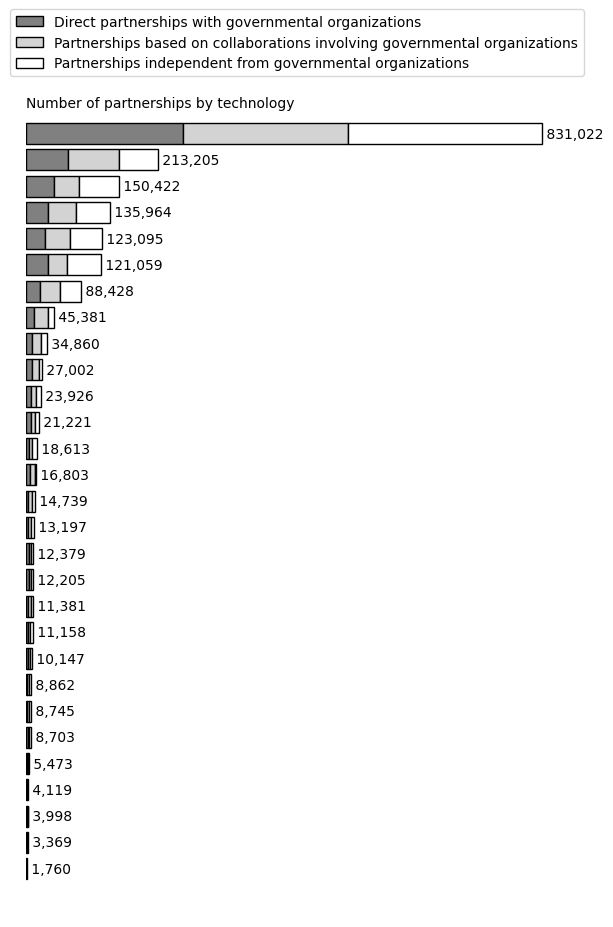

In [17]:
import matplotlib.pyplot as plt

### create a stacked barchart to show how partnerships distribute across governmental involvement (direct and indirect)
df_bars = df_governmental_involvement_by_tech_collab[df_governmental_involvement_by_tech_collab.collab=="All"]
df_bars = df_bars[["technology","total_partnerships","gov_partnerships_direct","gov_partnerships_indirect"]]
# make technology an index
df_bars = df_bars.set_index("technology")

#order the technologies by the list_ordered_techs
df_bars = df_bars.loc[list_ordered_techs]
# reverse the order
df_bars = df_bars.iloc[::-1]

df_bars = df_bars.reset_index()
#print(df_bars)


bars_gov_direct = list(df_bars["gov_partnerships_direct"])
bars_gov_indirect = list(df_bars["gov_partnerships_indirect"]-df_bars["gov_partnerships_direct"])
bars_rest = list(df_bars["total_partnerships"]-df_bars["gov_partnerships_indirect"])
print(bars_rest)

#create a stacked bar chart (vertically)

plt.figure(figsize=(7, 10.8))
plt.barh(df_bars["technology"], bars_gov_direct, color='gray', edgecolor='black')
plt.barh(df_bars["technology"], bars_gov_indirect, left=bars_gov_direct, color='lightgray', edgecolor='black')
plt.barh(df_bars["technology"], bars_rest, left=[sum(x) for x in zip(bars_gov_direct, bars_gov_indirect)], color='white', edgecolor='black')

# Write the values with the total number of partnerships at the end of each bar
for i, tech in enumerate(df_bars["technology"]):
    # Adding the total partnerships text on top of the bars
    plt.text(
        bars_gov_direct[i] + bars_gov_indirect[i] + bars_rest[i],  # Position of the text
        i,  # The y-position (index in df_bars)
        ' {:,}'.format(bars_gov_direct[i] + bars_gov_indirect[i] + bars_rest[i]),  # Text (number of partnerships)
        va='center'  # Vertical alignment to center the text
    )
# Remove the frame/spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Remove x-axis and y-axis labels and ticks
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# add a text above the plot
plt.text(0.5, 29, 'Number of partnerships by technology', fontsize=10)
#plt.title('Number of Partnerships by Technology', fontsize=10)


# add a legend locate the legend above the plot
plt.legend(["Direct partnerships with governmental organizations", "Partnerships based on collaborations involving governmental organizations", "Partnerships independent from governmental organizations"], loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1, fontsize=10)

plt.savefig('bars_partnerships_govs.pdf', bbox_inches='tight')
plt.savefig('bars_partnerships_govs.png', bbox_inches='tight')

In [18]:
total_partnerships = []
for tech in df_bars["technology"]:
    total_partnerships.append(df_bars[df_bars["technology"]==tech]["total_partnerships"].values[0])
print(total_partnerships)

[np.int64(1760), np.int64(3369), np.int64(3998), np.int64(4119), np.int64(5473), np.int64(8703), np.int64(8745), np.int64(8862), np.int64(10147), np.int64(11158), np.int64(11381), np.int64(12205), np.int64(12379), np.int64(13197), np.int64(14739), np.int64(16803), np.int64(18613), np.int64(21221), np.int64(23926), np.int64(27002), np.int64(34860), np.int64(45381), np.int64(88428), np.int64(121059), np.int64(123095), np.int64(135964), np.int64(150422), np.int64(213205), np.int64(831022)]


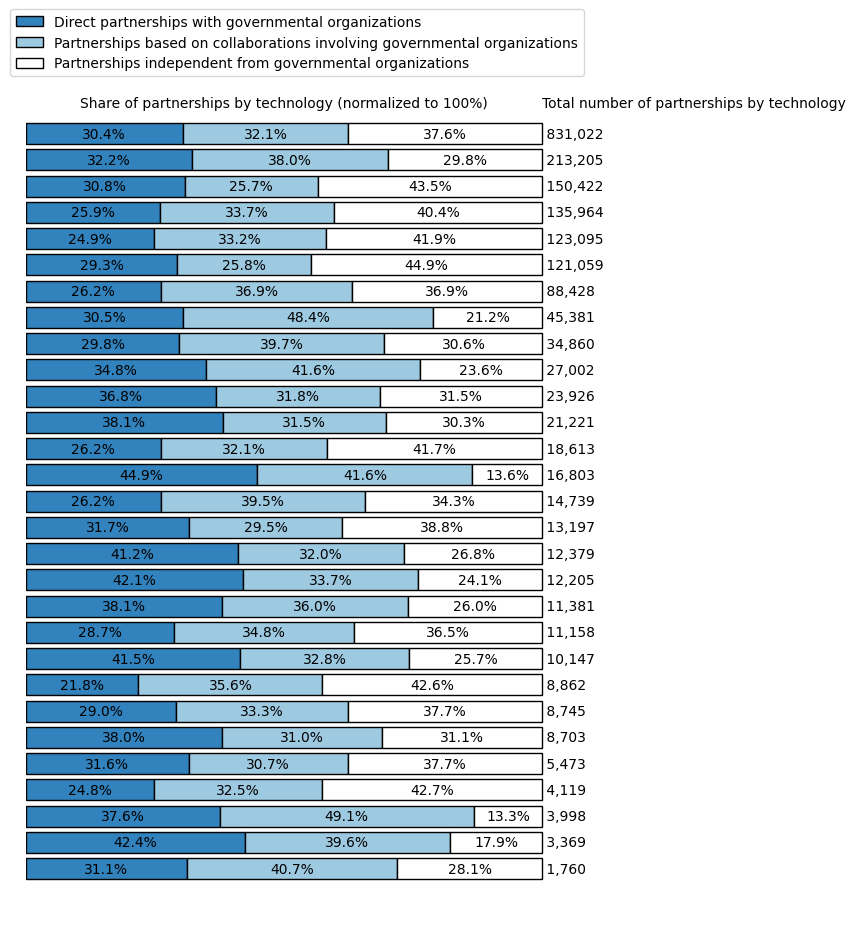

In [19]:
# barplot with a normalized length of bars
import matplotlib.pyplot as plt
import numpy as np

# Normalize the data so that each bar sums to 100%
total_partnerships = df_bars["total_partnerships"]
bars_gov_direct = df_bars["gov_partnerships_direct"] / total_partnerships * 100
bars_gov_indirect = (df_bars["gov_partnerships_indirect"] - df_bars["gov_partnerships_direct"]) / total_partnerships * 100
bars_rest = (df_bars["total_partnerships"] - df_bars["gov_partnerships_indirect"]) / total_partnerships * 100

# Create the stacked horizontal bar chart
plt.figure(figsize=(7, 10.8))
plt.barh(df_bars["technology"], bars_gov_direct, color='#3182bd', edgecolor='black', label="Direct partnerships with governmental organizations")
plt.barh(df_bars["technology"], bars_gov_indirect, left=bars_gov_direct, color='#9ecae1', edgecolor='black', label="Partnerships based on collaborations involving governmental organizations")
plt.barh(df_bars["technology"], bars_rest, left=bars_gov_direct + bars_gov_indirect, color='white', edgecolor='black', label="Partnerships independent from governmental organizations")

# Write the percentage values at the end of each bar
for i, tech in enumerate(df_bars["technology"]):
    total = total_partnerships[i]
    plt.text(100, i,
             ' {:,}'.format(total),  # Text (number of partnerships)
        va='center'  # Vertical alignment to center the text
    )

# write the headline for hte numbers
plt.text(100, 29, 'Total number of partnerships by technology', fontsize=10)

# Write the percentage values inside each bar
for i, tech in enumerate(df_bars["technology"]):
    plt.text(bars_gov_direct.iloc[i] / 2, i, f'{bars_gov_direct.iloc[i]:.1f}%', va='center', ha='center', color='black')
    plt.text(bars_gov_direct.iloc[i] + bars_gov_indirect.iloc[i] / 2, i, f'{bars_gov_indirect.iloc[i]:.1f}%', va='center', ha='center', color='black')
    plt.text(bars_gov_direct.iloc[i] + bars_gov_indirect.iloc[i] + bars_rest.iloc[i] / 2, i, f'{bars_rest.iloc[i]:.1f}%', va='center', ha='center', color='black')


# Remove the frame/spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Remove x-axis and y-axis labels and ticks
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Add a title above the plot
plt.text(50, len(df_bars), 'Share of partnerships by technology (normalized to 100%)', fontsize=10, ha='center')

# Add a legend above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1, fontsize=10)

plt.savefig('bars_partnerships_govs_normalized_blue.pdf', bbox_inches='tight')
plt.savefig('bars_partnerships_govs_normalized_blue.png', bbox_inches='tight')


In [21]:
"""PERIOD BEFORE THE IRA"""

long_df = pd.read_csv("../Data/innovation_network_prepost_2020-01-01.csv")
long_df['post_date'] = pd.to_datetime(long_df['post_date'])
long_df_pre = long_df[long_df['post_date'] < datetime.datetime(2022, 7, 1)]

columns = long_df_pre.columns[6:]

columns_= list(columns)
columns_.append('partners')

long_df_pre["partners"] = long_df_pre.apply(lambda x: '-'.join(sorted([x['source'], x['target']])), axis=1)

list_post_ids = list(long_df_pre["collaboration_id"][long_df_pre["source"].isin(list_govermentals) | long_df_pre["target"].isin(list_govermentals)].drop_duplicates())

#### Check how many partnerships would collaps without governmentals
number_of_direct_gov_partnerships = long_df_pre[long_df_pre["source"].isin(list_govermentals) | long_df_pre["target"].isin(list_govermentals)].drop_duplicates(subset=columns_[28:]).shape[0]
print("number of direct partnerships",number_of_direct_gov_partnerships)

number_of_gov_partnerships = long_df_pre[long_df_pre["collaboration_id"].isin(list_post_ids)].drop_duplicates(subset=columns_).shape[0]
partners_in_gov_partnerships = long_df_pre[long_df_pre["collaboration_id"].isin(list_post_ids)]["partners"].drop_duplicates()
print("number of partnerships related to governmentals: ", number_of_gov_partnerships)


long_df_unique = long_df_pre.drop_duplicates(subset=columns_)
print("number of total partnerships: ", long_df_unique.shape[0])

/var/folders/pq/_r_xc3wx2t79gmb10j_gbz_8043sw5/T/ipykernel_57713/4106384236.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_df_pre["partners"] = long_df_pre.apply(lambda x: '-'.join(sorted([x['source'], x['target']])), axis=1)


number of direct partnerships 111130
number of partnerships related to governmentals:  244170
number of total partnerships:  423874
